-----
<span style="color:Navy">

<h1 align="center">Notable Observations of Species</h3>
    
### Notable Observations: What makes them notable?

#### According to the eBird API documentation, notable observations can be for locally or nationally rare species or are otherwise unusual, e.g. over-wintering birds in a species which is normally only a summer visitor.


<span style="color:DarkSlateBlue">

##### Citation for all data used in this notebook: eBird Basic Dataset. Version: EBD_relAug-2020. Cornell Lab of Ornithology, Ithaca, New York. Aug 2020.

-----
<img src="./Resources/Calliope_Range_Map.png" alt="RANGE MAP: Calliope Hummingbird, https://doi.org/10.2173/bow.calhum.01" style="border: 1px solid darkgray" align="left" width="500px">

<span style="color:darkgreen">
<h1 align="center">Notable Observations in Texas</h1>
<h3 align="center">of the</h3>
<h2 align="center">Calliope Hummingbird, Selasphorus calliope</h2>
    
#### Some range maps for the Calliope Hummingbird extend the Fall Migration zone further east in Texas, but the majority limit the range to west Texas or even far west Texas.  The fall migration south is underway as the Calliope make their way to their wintering grounds in the pine oak forests of Mexico.
    
<span style="color:blue">
    
    


### Let's see if we can map the observations of Calliopes in Texas and compare them to observations along the traditional fall southern migration flyway...
   
---

<span style="color:darkgreen">
   
#### Some interesting facts (from WhatBird.com):
    
#### The Calliope Hummingbird is the smallest bird in the United States, yet it travels more than 5,000 miles from the mountains of the northwest to Mexico and back.

#### The Calliope Hummingbird is the smallest breeding bird in North America and the smallest long-distance avian migrant in the world.

#### It prefers high mountains, and has been seen as high as 11,000 feet.
        
#### A group of hummingbirds has many collective nouns, including a “bouquet", "glittering", "hover", "shimmer", and "tune” of hummingbirds.
    
-----
    
##### <blockquote>Image citation: Calder, W. A. and L. L. Calder (2020). Calliope Hummingbird (Selasphorus calliope), version 1.0. In Birds of the World (A. F. Poole and F. B. Gill, Editors). Cornell Lab of Ornithology, Ithaca, NY, USA. https://doi.org/10.2173/bow.calhum.01</blockquote>

-----

<img src="./Resources/Calliope_1.jpg" alt="Calliope Image 1" style="border: 1px solid darkgray" align="right" width="600px">


-----

In [1]:
# import dependencies
import os, csv, requests, json, datetime
import pandas as pd
import numpy as np
import plotly.express as px
from config import api_key, mapbox_token
from datetime import date

%reload_ext lab_black

px.set_mapbox_access_token(mapbox_token)

<span style="color:darkgreen">

# TEXAS


In [80]:
today = date.today()
days_back_short = 3
days_back_long = 30

regionCode = "US-TX"

m = 1
d = 1
y = 2000

<span style="color:darkgreen">
    
### Whooping Crane, Grus americana

#### A rare species. From Current Results, https://www.currentresults.com/Endangered-Animals/North-America/rare-birds.php:
#### Prior to 1870, about 1,400 whooping cranes lived in North America. Their number declined to a low of 15 individuals in 1941. Breeding in captivity and releases into the wild have built up three flocks. The largest group, totalling 237 birds in early 2007, nests in Alberta's Wood Buffalo Park and winters in Texas at Aransas National Wildlife Refuge. The winter 2006-07 census counted 518 whooping cranes in all, including 373 free-living birds.

In [110]:
species = "Whooping-Crane"

In [111]:
url_whooping_crane = (
    "https://api.ebird.org/v2/data/obs/"
    + f"{regionCode}/historic/{{y}}/{{m}}/{{d}}?{species}"  # why the double {{y}} for these variables?
)

r_whoop = requests.get(
    url_whooping_crane, params={"key": api_key, "y": y, "m": m, "d": d}
)

In [112]:
url_whooping_crane

'https://api.ebird.org/v2/data/obs/US-TX/historic/{y}/{m}/{d}?Whooping-Crane'

In [113]:
r_whoop.status_code

200

In [114]:
df_whoops = pd.DataFrame(r_whoop.json())

In [124]:
df_whoops.loc[df_whoops["comName"] == "Whooping Crane"]

Empty DataFrame
Columns: [speciesCode, comName, sciName, locId, locName, obsDt, howMany, lat, lng, obsValid, obsReviewed, locationPrivate, subId]
Index: []

<span style="color:darkgreen">

### Texas Notable Observations Dataframe

In [3]:
# ALL notable observations in Texas

url_notables = (
    "https://api.ebird.org/v2/data/obs/"
    + regionCode
    + f"/recent/notable?back={days_back_long}"  # max number of days back for observations = 30
)

r_notables = requests.get(
    url_notables, params={"key": api_key, "back": days_back_long, "detail": "full"}
)

In [4]:
df_notables = pd.DataFrame(r_notables.json())

In [5]:
df_notables

speciesCode                   comName                 sciName      locId  \
0         marwre                Marsh Wren   Cistothorus palustris  L12083555   
1         marwre                Marsh Wren   Cistothorus palustris  L12083555   
2         yegvir        Yellow-green Vireo      Vireo flavoviridis   L8660061   
3         trokin         Tropical Kingbird  Tyrannus melancholicus  L16239555   
4         swtkit       Swallow-tailed Kite    Elanoides forficatus   L1655419   
...          ...                       ...                     ...        ...   
3437      gadwal                   Gadwall         Mareca strepera   L1025550   
3438      doccor  Double-crested Cormorant     Nannopterum auritum   L1025550   
3439      leafly          Least Flycatcher       Empidonax minimus   L2960656   
3440      leafly          Least Flycatcher       Empidonax minimus   L2960656   
3441      leafly          Least Flycatcher       Empidonax minimus   L2960656   

                                                locName             obsDt  \
0                                      Home - Bryan, TX  2021-08-29 12:00   
1                                      Home - Bryan, TX  2021-08-29 12:00   
2                      Aransas NWR--Songbird Loop Trail  2021-08-29 11:21   
3     9850 South Gulfway Drive, Port Arthur, Texas, ...  2021-08-29 11:18   
4                       Bastrop Co.--Sayers Rd. (CR157)  2021-08-29 10:59   
...                                                 ...               ...   
3437                             TX118 at Musquiz Creek  2021-07-30 17:59   
3438                             TX118 at Musquiz Creek  2021-07-30 17:59   
3439                     US-TX-Talpa - 31.8193x-99.6274  2021-07-30 16:30   
3440                     US-TX-Talpa - 31.8193x-99.6274  2021-07-30 16:30   
3441                     US-TX-Talpa - 31.8193x-99.6274  2021-07-30 16:30   

      howMany        lat         lng  obsValid  ...    countryName  \
0         2.0  30.659565  -96.340228     False  ...  United States   
1         2.0  30.659565  -96.340228     False  ...  United States   
2         1.0  28.299126  -96.807527     False  ...  United States   
3         2.0  29.703125  -93.934719     False  ...  United States   
4         3.0  30.201928  -97.360245     False  ...  United States   
...       ...        ...         ...       ...  ...            ...   
3437      2.0  30.535690 -103.803430      True  ...  United States   
3438      1.0  30.535690 -103.803430      True  ...  United States   
3439      1.0  31.819338  -99.627398     False  ...  United States   
3440      1.0  31.819338  -99.627398     False  ...  United States   
3441      1.0  31.819338  -99.627398     False  ...  United States   

         userDisplayName          obsId checklistId presenceNoted hasComments  \
0         Dayna Williams  OBS1226503834     CL22990         False       False   
1         Dayna Williams  OBS1226503834     CL22990         False       False   
2          Willie Sekula  OBS1226486409     CL23617         False       False   
3        Michelle Romedy  OBS1226467928     CL22322         False       False   
4        Jason Leifester  OBS1226480833     CL23371         False       False   
...                  ...            ...         ...           ...         ...   
3437   Nick A. Komar Jr.  OBS1210012581     CL23634         False       False   
3438         Jeff Sexton  OBS1209415473     CL23634         False       False   
3439  Angie Westmoreland  OBS1211032486     CL27727         False       False   
3440  Angie Westmoreland  OBS1211032486     CL27727         False       False   
3441  Angie Westmoreland  OBS1211032486     CL27727         False       False   

     evidence firstName      lastName hasRichMedia  
0           P     Dayna      Williams         True  
1           P     Dayna      Williams         True  
2         NaN    Willie        Sekula        False  
3         NaN  Michelle        Romedy        False  
4         NaN     Jason     

In [6]:
pd.to_datetime(df_notables["obsDt"])
df_notables["Year"] = pd.DatetimeIndex(df_notables["obsDt"]).year
df_notables["Month"] = pd.DatetimeIndex(df_notables["obsDt"]).month
df_notables["Day"] = pd.DatetimeIndex(df_notables["obsDt"]).day

In [7]:
columns_dict = {
    "speciesCode": "Species_Code",
    "comName": "Common_Name",
    "sciName": "Scientific_Name",
    "obsDt": "Date",
    "howMany": "Bird_Count",
    "subnational2Code": "City_Code",
    "subnational2Name": "City_Name",
    "subnational1Code": "State_Code",
    "subnational1Name": "State_Name",
    "countryCode": "Country_Code",
    "countryName": "Country_Name",
}

df_notables = df_notables.rename(columns=columns_dict)

In [8]:
df_notables["Bird_Count"].fillna(value=1, inplace=True)

<span style="color:darkgreen">

### Save data to CSV file

In [9]:
df_notables.to_csv("Resources/TX_NotableObs_eBird.csv", index=False)

In [10]:
TX_NOTABLE_OBS = os.path.join("Resources", "TX_NotableObs_eBird.csv")
TX_NOTABLE_OBS_df = pd.read_csv(TX_NOTABLE_OBS)

<span style="color:darkgreen">

### Some data cleaning

In [11]:
TX_NOTABLE_OBS_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'Date', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'City_Code', 'City_Name', 'State_Code',
       'State_Name', 'Country_Code', 'Country_Name', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'evidence',
       'firstName', 'lastName', 'hasRichMedia', 'Year', 'Month', 'Day'],
      dtype='object')

In [12]:
TX_NOTABLE_OBS_df.drop_duplicates(inplace=True)

-----

<span style="color:darkgreen">

# Mapping

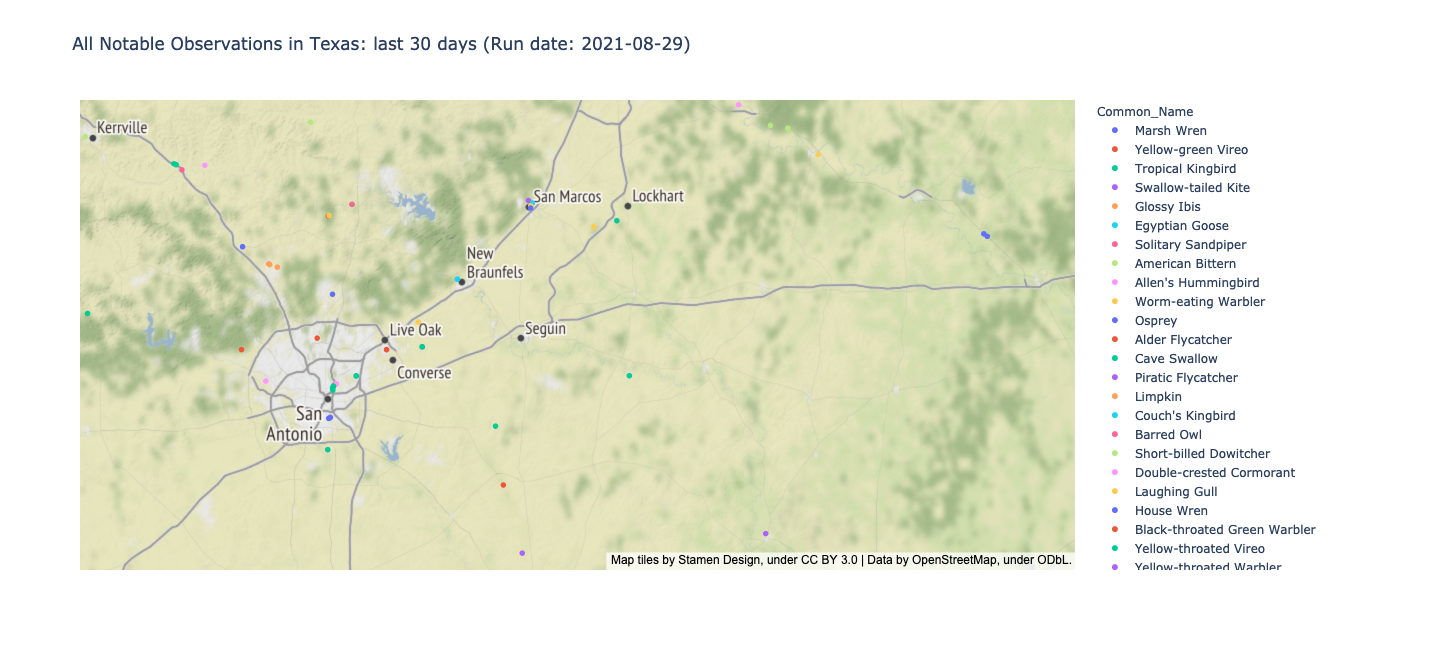

In [13]:
# mapbox_style options:
#     'open-street-map'`,
#     `'white-bg'`, `'carto-positron'`, `'carto-darkmatter'`, `'stamen-
#     terrain'`, `'stamen-toner'`, `'stamen-watercolor'`.

# Allowed values which do require a Mapbox API token are `'basic'`, `'streets'`,
#     `'outdoors'`, `'light'`, `'dark'`, `'satellite'`, `'satellite-
#     streets'`

fig_TX_NOTABLE_OBS_df = px.scatter_mapbox(
    TX_NOTABLE_OBS_df,
    lat="lat",
    lon="lng",
    color="Common_Name",
    #     size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Bird_Count", "Date", "obsValid"],
    title=f"All Notable Observations in Texas: last {days_back_long} days (Run date: {today})",
    mapbox_style="stamen-terrain",
    width=1000,
    height=650,
)
fig_TX_NOTABLE_OBS_df.show()

<span style="color:darkgreen">
    
### The eBird API limits the number of records that can be requested at one time to 10,000.  Therefore, it was important to define the area of interest in order to narrow the results to a reasonably-sized dataset. Texas was the obvious choice, and this map shows all observations described as "notable" over the last 30 days.
    
### With this map, one can explore the various notable bird sightings in each area of interest around Texas.  Tooltips identify the comomon name, coordinates, count, date of the observation, and the status of the validity of the observation.

-----

<span style="color:darkgreen">

## Notable Observations - Most common species

In [14]:
name_count = TX_NOTABLE_OBS_df["Common_Name"].value_counts()
name_count_df = name_count.to_frame()
name_count_df

Common_Name
Band-rumped Storm-Petrel          135
Brown Booby                       126
Limpkin                            85
Leach's Storm-Petrel               80
Red-necked Phalarope               59
...                               ...
Carolina Chickadee                  1
Western Sandpiper                   1
Least Flycatcher                    1
Piratic Flycatcher                  1
Red-eyed Vireo                      1

[219 rows x 1 columns]

In [15]:
species = name_count_df["Common_Name"].idxmax()
species

'Band-rumped Storm-Petrel'

In [16]:
TX_species_df = TX_NOTABLE_OBS_df.loc[TX_NOTABLE_OBS_df["Common_Name"] == species]
TX_species_df = TX_species_df.reset_index().drop(columns="index")
TX_species_df["Notable_Normal"] = 2
TX_species_df.head(1)

Species_Code               Common_Name    Scientific_Name     locId  \
0       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L4027908   

                 locName              Date  Bird_Count        lat        lng  \
0  Offshore Port Aransas  2021-08-15 07:30         3.0  27.789373 -97.026788   

   obsValid  ...  presenceNoted  hasComments evidence firstName  lastName  \
0      True  ...          False        False      NaN       Jon  McIntyre   

  hasRichMedia  Year Month Day Notable_Normal  
0        False  2021     8  15              2  

[1 rows x 32 columns]

<span style="color:darkgreen">

### Save species data to CSV

In [17]:
TX_species_df.to_csv("Resources/TX_Species_Obs_eBird.csv", index=False)

In [18]:
TX_SPECIES_OBS = os.path.join("Resources", "TX_Species_Obs_eBird.csv")
TX_SPECIES_OBS_df = pd.read_csv(TX_SPECIES_OBS)

-----

<span style="color:darkgreen">

## Taxonomy of the Calliope Hummingbird

<span style="color:darkgreen">

#### Calliope Hummingbird in Flight

![alt](Resources/Calliope_2.jpg)

In [19]:
species_code = TX_species_df["Species_Code"][0]

In [20]:
# Get the taxonomy for the most common observed species
url_species_taxonomy = "https://api.ebird.org/v2/ref/taxonomy/ebird"

r_species_taxonomy = requests.get(
    url_species_taxonomy,
    params={"key": api_key, "fmt": "json", "species": species_code},
)

In [21]:
r_species_taxonomy.status_code

200

In [22]:
species_taxonomy = pd.DataFrame(r_species_taxonomy.json())
species_taxonomy

sciName                   comName speciesCode category  \
0  Hydrobates castro  Band-rumped Storm-Petrel      barpet  species   

   taxonOrder bandingCodes      comNameCodes sciNameCodes              order  \
0      6734.0       [BSTP]  [BRSP, MSPE, ʻB]       [HYCA]  Procellariiformes   

            familyComName familySciName  
0  Northern Storm-Petrels  Hydrobatidae

In [23]:
species_taxonomy = species_taxonomy.rename(
    columns={
        "order": "Order",
        "familySciName": "Family_Name",
        "comName": "Common_Name",
        "sciName": "Scientific_Name",
    }
)

<span style="color:darkgreen">

### Save taxonomy data to CSV

In [24]:
species_taxonomy.to_csv("Resources/Species_Taxonomy.csv", index=False)

species_taxonomy_df = pd.read_csv("Resources/Species_Taxonomy.csv")

species_family_name = species_taxonomy_df["Family_Name"][
    0
]  # Work with data from the saved CSV file in order to protect the integrity of the data

<span style="color:darkgreen">

### Add the Family name of the species into the observations dataframe

In [25]:
TX_species_df = TX_species_df.assign(Family_Name=species_family_name)

In [26]:
TX_species_df

Species_Code               Common_Name    Scientific_Name      locId  \
0         barpet  Band-rumped Storm-Petrel  Hydrobates castro   L4027908   
1         barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16141897   
2         barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16141897   
3         barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110889   
4         barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110889   
..           ...                       ...                ...        ...   
130       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110829   
131       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110829   
132       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110829   
133       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110829   
134       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16106451   

                                               locName              Date  \
0                                Offshore Port Aransas  2021-08-15 07:30   
1                         GOM-SPI Pelagic--14AUG2021 I  2021-08-14 13:30   
2                         GOM-SPI Pelagic--14AUG2021 I  2021-08-14 13:30   
3    GOM pelagic 08/14/21 segment 8; 26.23465, -96....  2021-08-14 13:16   
4    GOM pelagic 08/14/21 segment 8; 26.23465, -96....  2021-08-14 13:16   
..                                                 ...               ...   
130  GOM pelagic 08/14/21 segment 4; 26.05583, -96....  2021-08-14 09:27   
131  GOM pelagic 08/14/21 segment 4; 26.05583, -96....  2021-08-14 09:27   
132  GOM pelagic 08/14/21 segment 4; 26.05583, -96....  2021-08-14 09:27   
133  GOM pelagic 08/14/21 segment 4; 26.05583, -96....  2021-08-14 09:27   
134  Kara Sea, South Padre Island US-TX 26.07620, -...  2021-08-14 06:03   

     Bird_Count        lat        lng  obsValid  ...  hasComments  evidence  \
0           3.0  27.789373 -97.026788      True  ...        False       NaN   
1           2.0  26.264783 -96.356729      True  ...        False       NaN   
2           2.0  26.264783 -96.356729      True  ...        False       NaN   
3           1.0  26.234646 -96.264862      True  ...        False       NaN   
4           1.0  26.234646 -96.264862      True  ...        False       NaN   
..          ...        ...        ...       ...  ...          ...       ...   
130         2.0  26.055827 -96.467776      True  ...        False         P   
131         2.0  26.055827 -96.467776      True  ...        False         P   
132         2.0  26.055827 -96.467776      True  ...        False         P   
133         2.0  26.055827 -96.467776      True  ...        False         P   
134        12.0  26.076201 -97.165040      True  ...        False       NaN   

    firstName   lastName hasRichMedia  Year Month Day Notable_Normal  \
0         Jon   McIntyre        False  2021     8  15              2   
1      Justin     Bosler        False  2021     8  14              2   
2        Jeff     Sexton        False  2021     8  14              2   
3        John    O'Brien        False  2021     8  14              2   
4        Tony      Frank        False  2021     8  14              2   
..        ...        ...          ...   ...   ...  ..            ...   
130      John       Pike         True  2021     8  14              2   
131        T.  Jay Adams         True  2021     8  14              2   
132   Mariann     Golden         True  2021     8  14              2   
133      Greg     Duncan         True  2021     8  14              2   
134       Ted     Zobeck        False  2021     8  14              2   

      Family_Name  
0    Hydrobatidae  
1    Hydrobatidae  
2    Hydrobatidae  
3    Hydrobatidae  
4    Hydrobatidae  
..            ...  
130  Hydrobatidae  
131  Hydrobatidae  
132  Hydrobatidae  
133  Hydrobatidae  
134  Hydrobatidae  

[135 rows x 33 columns]

-----

<span style="color:darkgreen">
    
## Mapping species-specific observations

<span style="color:darkgreen">
    
### The most commonly sighted bird in the notable category in Texas was identified as the Calliope Hummingbird.  All observations of Calliope in Texas over the last 30 days are shown here.
    
### The question again is: what makes sightings of Calliope around Texas notable?  Recall the range map shown earlier.  Each of these observations falls outside of the normal range for this species.

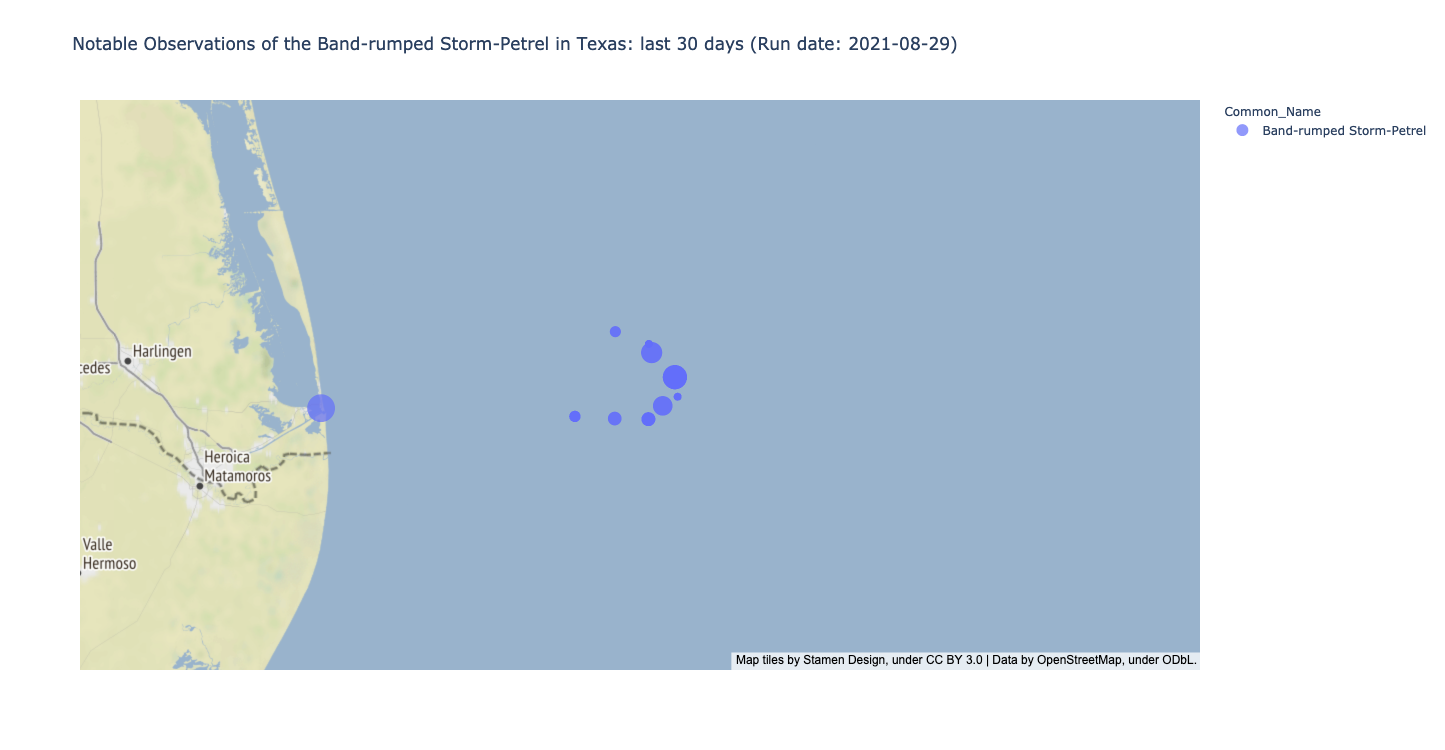

In [27]:
fig_TX_species_df = px.scatter_mapbox(
    TX_species_df,
    lat="lat",
    lon="lng",
    color="Common_Name",
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Common_Name", "Family_Name", "Bird_Count", "Date"],
    title=f"Notable Observations of the {species} in Texas: last {days_back_long} days (Run date: {today})",
    mapbox_style="stamen-terrain",
    width=1100,
    height=750,
)
fig_TX_species_df.show()

-----

<span style="color:darkgreen">

# U.S.

<span style="color:darkgreen">

### Calliope across the US - normal observations

In [28]:
# Get data for specified species observations across the US

regionCodeUS = "US"

url_US_species = (
    f"https://api.ebird.org/v2/data/obs/" + regionCodeUS + "/recent/" + species_code
)

r_US_species = requests.get(
    url_US_species, params={"key": api_key, "back": days_back_long}
)

In [29]:
r_US_species.status_code

200

In [30]:
US_species_df = pd.DataFrame(r_US_species.json())

In [31]:
US_species_df["howMany"].fillna(value=1, inplace=True)

In [32]:
US_species_df["Notable_Normal"] = 1
US_species_df

speciesCode                   comName            sciName      locId  \
0       barpet  Band-rumped Storm-Petrel  Hydrobates castro    L548893   
1       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16162089   
2       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16151356   
3       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16147155   
4       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16145553   
5       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16144467   
6       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16147143   
7       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16140884   
8       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16137917   
9       barpet  Band-rumped Storm-Petrel  Hydrobates castro   L2827181   
10      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16128571   
11      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16128556   
12      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16128545   
13      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16124531   
14      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16123428   
15      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16118735   
16      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16118748   
17      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16119031   
18      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16119050   
19      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16113940   
20      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16111711   
21      barpet  Band-rumped Storm-Petrel  Hydrobates castro   L4027908   
22      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110565   
23      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16106382   
24      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16105648   
25      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16104998   
26      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16104523   
27      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16141897   
28      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110889   
29      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16141877   
30      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110877   
31      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110863   
32      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16131562   
33      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110853   
34      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16120329   
35      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16131536   
36      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110829   
37      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110590   
38      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16120323   
39      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16099863   
40      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16120313   
41      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16098652   
42      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16106451   
43      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110573   
44      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16120309   
45      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16094407   
46      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16069455   
47      barpet  Band-rumped Storm-Petrel  Hydrobates castro    L804436   
48      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16069522   
49      barpet  Band-rumped Storm-Petrel  Hydrobates castro    L391848   
50      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16052168   
51      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16052344   
52      barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16073387   
53     

In [33]:
US_species_columns_dict = {
    "speciesCode": "Species_Code",
    "comName": "Common_Name",
    "sciName": "Scientific_Name",
    "obsDt": "Date",
    "howMany": "Bird_Count",
}

US_species_df = US_species_df.rename(columns=US_species_columns_dict)

In [34]:
pd.to_datetime(US_species_df["Date"])
US_species_df["Year"] = pd.DatetimeIndex(US_species_df["Date"]).year
US_species_df["Month"] = pd.DatetimeIndex(US_species_df["Date"]).month
US_species_df["Day"] = pd.DatetimeIndex(US_species_df["Date"]).day
US_species_df = US_species_df.assign(Family_Name=species_family_name)

In [35]:
US_species_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'Date', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'Notable_Normal', 'Year', 'Month', 'Day',
       'Family_Name'],
      dtype='object')

In [36]:
US_species_df = US_species_df.drop(
    columns=["locId", "locName", "obsValid", "obsReviewed", "locationPrivate"]
)
US_species_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'Date', 'Bird_Count',
       'lat', 'lng', 'subId', 'Notable_Normal', 'Year', 'Month', 'Day',
       'Family_Name'],
      dtype='object')

<span style="color:darkgreen">

### Save species-specific data to CSV

In [37]:
US_species_df.to_csv("Resources/US_Species_Obs_eBird.csv", index=False)
US_SPECIES_OBS = os.path.join("Resources", "US_Species_Obs_eBird.csv")
US_SPECIES_OBS_df = pd.read_csv(US_SPECIES_OBS)

In [38]:
US_SPECIES_OBS_df.drop_duplicates()

Species_Code               Common_Name    Scientific_Name  \
0        barpet  Band-rumped Storm-Petrel  Hydrobates castro   
1        barpet  Band-rumped Storm-Petrel  Hydrobates castro   
2        barpet  Band-rumped Storm-Petrel  Hydrobates castro   
3        barpet  Band-rumped Storm-Petrel  Hydrobates castro   
4        barpet  Band-rumped Storm-Petrel  Hydrobates castro   
5        barpet  Band-rumped Storm-Petrel  Hydrobates castro   
6        barpet  Band-rumped Storm-Petrel  Hydrobates castro   
7        barpet  Band-rumped Storm-Petrel  Hydrobates castro   
8        barpet  Band-rumped Storm-Petrel  Hydrobates castro   
9        barpet  Band-rumped Storm-Petrel  Hydrobates castro   
10       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
11       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
12       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
13       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
14       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
15       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
16       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
17       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
18       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
19       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
20       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
21       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
22       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
23       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
24       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
25       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
26       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
27       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
28       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
29       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
30       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
31       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
32       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
33       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
34       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
35       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
36       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
37       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
38       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
39       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
40       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
41       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
42       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
43       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
44       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
45       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
46       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
47       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
48       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
49       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
50       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
51       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
52       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
53       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
54       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
55       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
56       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
57       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
58       barpet  Band-rumped Storm-Petrel  Hydrobates castro   

                Date  Bird_Count        lat         lng      subId  \
0   2021-08-27 11:30           4  34.858891  -75.245361  S93849819   
1   2021-08-20 07:28  

In [39]:
TX_SPECIES_OBS_df

Species_Code               Common_Name    Scientific_Name      locId  \
0         barpet  Band-rumped Storm-Petrel  Hydrobates castro   L4027908   
1         barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16141897   
2         barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16141897   
3         barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110889   
4         barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110889   
..           ...                       ...                ...        ...   
130       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110829   
131       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110829   
132       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110829   
133       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16110829   
134       barpet  Band-rumped Storm-Petrel  Hydrobates castro  L16106451   

                                               locName              Date  \
0                                Offshore Port Aransas  2021-08-15 07:30   
1                         GOM-SPI Pelagic--14AUG2021 I  2021-08-14 13:30   
2                         GOM-SPI Pelagic--14AUG2021 I  2021-08-14 13:30   
3    GOM pelagic 08/14/21 segment 8; 26.23465, -96....  2021-08-14 13:16   
4    GOM pelagic 08/14/21 segment 8; 26.23465, -96....  2021-08-14 13:16   
..                                                 ...               ...   
130  GOM pelagic 08/14/21 segment 4; 26.05583, -96....  2021-08-14 09:27   
131  GOM pelagic 08/14/21 segment 4; 26.05583, -96....  2021-08-14 09:27   
132  GOM pelagic 08/14/21 segment 4; 26.05583, -96....  2021-08-14 09:27   
133  GOM pelagic 08/14/21 segment 4; 26.05583, -96....  2021-08-14 09:27   
134  Kara Sea, South Padre Island US-TX 26.07620, -...  2021-08-14 06:03   

     Bird_Count        lat        lng  obsValid  ...  presenceNoted  \
0           3.0  27.789373 -97.026788      True  ...          False   
1           2.0  26.264783 -96.356729      True  ...          False   
2           2.0  26.264783 -96.356729      True  ...          False   
3           1.0  26.234646 -96.264862      True  ...          False   
4           1.0  26.234646 -96.264862      True  ...          False   
..          ...        ...        ...       ...  ...            ...   
130         2.0  26.055827 -96.467776      True  ...          False   
131         2.0  26.055827 -96.467776      True  ...          False   
132         2.0  26.055827 -96.467776      True  ...          False   
133         2.0  26.055827 -96.467776      True  ...          False   
134        12.0  26.076201 -97.165040      True  ...          False   

     hasComments evidence firstName   lastName hasRichMedia  Year Month Day  \
0          False      NaN       Jon   McIntyre        False  2021     8  15   
1          False      NaN    Justin     Bosler        False  2021     8  14   
2          False      NaN      Jeff     Sexton        False  2021     8  14   
3          False      NaN      John    O'Brien        False  2021     8  14   
4          False      NaN      Tony      Frank        False  2021     8  14   
..           ...      ...       ...        ...          ...   ...   ...  ..   
130        False        P      John       Pike         True  2021     8  14   
131        False        P        T.  Jay Adams         True  2021     8  14   
132        False        P   Mariann     Golden         True  2021     8  14   
133        False        P      Greg     Duncan         True  2021     8  14   
134        False      NaN       Ted     Zobeck        False  2021     8  14   

    Notable_Normal  
0                2  
1                2  
2                2  
3                2  
4                2  
..             ...  
130              2  
131              2  
132              2  
133              2  
134              2  

[135 rows x 32 columns]

In [40]:
TX_SPECIES_OBS_df = TX_species_df.drop(
    columns=[
        "locId",
        "locName",
        "obsValid",
        "obsReviewed",
        "locationPrivate",
        "City_Code",
        "City_Name",
        "State_Code",
        "State_Name",
        "Country_Code",
        "Country_Name",
        "userDisplayName",
        "obsId",
        "checklistId",
        "presenceNoted",
        "hasComments",
        "firstName",
        "lastName",
        "hasRichMedia",
        "evidence",
    ]
)

In [41]:
TX_SPECIES_OBS_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'Date', 'Bird_Count',
       'lat', 'lng', 'subId', 'Year', 'Month', 'Day', 'Notable_Normal',
       'Family_Name'],
      dtype='object')

In [42]:
US_SPECIES_OBS_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'Date', 'Bird_Count',
       'lat', 'lng', 'subId', 'Notable_Normal', 'Year', 'Month', 'Day',
       'Family_Name'],
      dtype='object')

In [43]:
US_SPECIES_OBS_df["Notable"] = "No"
TX_SPECIES_OBS_df["Notable"] = "Yes"

<img src="./Resources/Calliope_clear.jpg" alt="Calliope Image 2" style="border: 1px solid darkgray" align="left" width="500px">

<span style="color:darkgreen">

### Combine the Texas and US dataframes into one and drop duplicates

In [44]:
frames = [US_SPECIES_OBS_df, TX_SPECIES_OBS_df]
result_df = pd.concat(frames)

In [45]:
result_df

Species_Code               Common_Name    Scientific_Name  \
0         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
1         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
2         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
3         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
4         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
..           ...                       ...                ...   
130       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
131       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
132       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
133       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
134       barpet  Band-rumped Storm-Petrel  Hydrobates castro   

                 Date  Bird_Count        lat        lng      subId  \
0    2021-08-27 11:30         4.0  34.858891 -75.245361  S93849819   
1    2021-08-20 07:28         2.0  39.629900 -71.681583  S93497147   
2    2021-08-19 09:30         1.0  40.093400 -68.251637  S93444973   
3    2021-08-18 15:17         2.0  39.602532 -68.793799  S93421457   
4    2021-08-18 14:30         2.0  39.477396 -68.822382  S93414656   
..                ...         ...        ...        ...        ...   
130  2021-08-14 09:27         2.0  26.055827 -96.467776  S93487228   
131  2021-08-14 09:27         2.0  26.055827 -96.467776  S93495893   
132  2021-08-14 09:27         2.0  26.055827 -96.467776  S93521901   
133  2021-08-14 09:27         2.0  26.055827 -96.467776  S93526557   
134  2021-08-14 06:03        12.0  26.076201 -97.165040  S93229467   

     Notable_Normal  Year  Month  Day   Family_Name Notable  
0                 1  2021      8   27  Hydrobatidae      No  
1                 1  2021      8   20  Hydrobatidae      No  
2                 1  2021      8   19  Hydrobatidae      No  
3                 1  2021      8   18  Hydrobatidae      No  
4                 1  2021      8   18  Hydrobatidae      No  
..              ...   ...    ...  ...           ...     ...  
130               2  2021      8   14  Hydrobatidae     Yes  
131               2  2021      8   14  Hydrobatidae     Yes  
132               2  2021      8   14  Hydrobatidae     Yes  
133               2  2021      8   14  Hydrobatidae     Yes  
134               2  2021      8   14  Hydrobatidae     Yes  

[194 rows x 14 columns]

In [46]:
result_df.loc[
    result_df["Notable"] == "Yes"
]  # Checking count of Notable observations before removing duplicates

Species_Code               Common_Name    Scientific_Name  \
0         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
1         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
2         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
3         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
4         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
..           ...                       ...                ...   
130       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
131       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
132       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
133       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
134       barpet  Band-rumped Storm-Petrel  Hydrobates castro   

                 Date  Bird_Count        lat        lng      subId  \
0    2021-08-15 07:30         3.0  27.789373 -97.026788  S93318255   
1    2021-08-14 13:30         2.0  26.264783 -96.356729  S93400649   
2    2021-08-14 13:30         2.0  26.264783 -96.356729  S93513114   
3    2021-08-14 13:16         1.0  26.234646 -96.264862  S93249416   
4    2021-08-14 13:16         1.0  26.234646 -96.264862  S93644729   
..                ...         ...        ...        ...        ...   
130  2021-08-14 09:27         2.0  26.055827 -96.467776  S93487228   
131  2021-08-14 09:27         2.0  26.055827 -96.467776  S93495893   
132  2021-08-14 09:27         2.0  26.055827 -96.467776  S93521901   
133  2021-08-14 09:27         2.0  26.055827 -96.467776  S93526557   
134  2021-08-14 06:03        12.0  26.076201 -97.165040  S93229467   

     Notable_Normal  Year  Month  Day   Family_Name Notable  
0                 2  2021      8   15  Hydrobatidae     Yes  
1                 2  2021      8   14  Hydrobatidae     Yes  
2                 2  2021      8   14  Hydrobatidae     Yes  
3                 2  2021      8   14  Hydrobatidae     Yes  
4                 2  2021      8   14  Hydrobatidae     Yes  
..              ...   ...    ...  ...           ...     ...  
130               2  2021      8   14  Hydrobatidae     Yes  
131               2  2021      8   14  Hydrobatidae     Yes  
132               2  2021      8   14  Hydrobatidae     Yes  
133               2  2021      8   14  Hydrobatidae     Yes  
134               2  2021      8   14  Hydrobatidae     Yes  

[135 rows x 14 columns]

In [47]:
result_df = result_df.drop_duplicates(subset="subId", keep="last")
result_df

Species_Code               Common_Name    Scientific_Name  \
0         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
1         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
2         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
3         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
4         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
..           ...                       ...                ...   
130       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
131       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
132       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
133       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
134       barpet  Band-rumped Storm-Petrel  Hydrobates castro   

                 Date  Bird_Count        lat        lng      subId  \
0    2021-08-27 11:30         4.0  34.858891 -75.245361  S93849819   
1    2021-08-20 07:28         2.0  39.629900 -71.681583  S93497147   
2    2021-08-19 09:30         1.0  40.093400 -68.251637  S93444973   
3    2021-08-18 15:17         2.0  39.602532 -68.793799  S93421457   
4    2021-08-18 14:30         2.0  39.477396 -68.822382  S93414656   
..                ...         ...        ...        ...        ...   
130  2021-08-14 09:27         2.0  26.055827 -96.467776  S93487228   
131  2021-08-14 09:27         2.0  26.055827 -96.467776  S93495893   
132  2021-08-14 09:27         2.0  26.055827 -96.467776  S93521901   
133  2021-08-14 09:27         2.0  26.055827 -96.467776  S93526557   
134  2021-08-14 06:03        12.0  26.076201 -97.165040  S93229467   

     Notable_Normal  Year  Month  Day   Family_Name Notable  
0                 1  2021      8   27  Hydrobatidae      No  
1                 1  2021      8   20  Hydrobatidae      No  
2                 1  2021      8   19  Hydrobatidae      No  
3                 1  2021      8   18  Hydrobatidae      No  
4                 1  2021      8   18  Hydrobatidae      No  
..              ...   ...    ...  ...           ...     ...  
130               2  2021      8   14  Hydrobatidae     Yes  
131               2  2021      8   14  Hydrobatidae     Yes  
132               2  2021      8   14  Hydrobatidae     Yes  
133               2  2021      8   14  Hydrobatidae     Yes  
134               2  2021      8   14  Hydrobatidae     Yes  

[183 rows x 14 columns]

In [48]:
result_df.loc[
    result_df["Notable"] == "Yes"
]  # Checking count of Notable observations after removing duplicates

Species_Code               Common_Name    Scientific_Name  \
0         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
1         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
2         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
3         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
4         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
..           ...                       ...                ...   
130       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
131       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
132       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
133       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
134       barpet  Band-rumped Storm-Petrel  Hydrobates castro   

                 Date  Bird_Count        lat        lng      subId  \
0    2021-08-15 07:30         3.0  27.789373 -97.026788  S93318255   
1    2021-08-14 13:30         2.0  26.264783 -96.356729  S93400649   
2    2021-08-14 13:30         2.0  26.264783 -96.356729  S93513114   
3    2021-08-14 13:16         1.0  26.234646 -96.264862  S93249416   
4    2021-08-14 13:16         1.0  26.234646 -96.264862  S93644729   
..                ...         ...        ...        ...        ...   
130  2021-08-14 09:27         2.0  26.055827 -96.467776  S93487228   
131  2021-08-14 09:27         2.0  26.055827 -96.467776  S93495893   
132  2021-08-14 09:27         2.0  26.055827 -96.467776  S93521901   
133  2021-08-14 09:27         2.0  26.055827 -96.467776  S93526557   
134  2021-08-14 06:03        12.0  26.076201 -97.165040  S93229467   

     Notable_Normal  Year  Month  Day   Family_Name Notable  
0                 2  2021      8   15  Hydrobatidae     Yes  
1                 2  2021      8   14  Hydrobatidae     Yes  
2                 2  2021      8   14  Hydrobatidae     Yes  
3                 2  2021      8   14  Hydrobatidae     Yes  
4                 2  2021      8   14  Hydrobatidae     Yes  
..              ...   ...    ...  ...           ...     ...  
130               2  2021      8   14  Hydrobatidae     Yes  
131               2  2021      8   14  Hydrobatidae     Yes  
132               2  2021      8   14  Hydrobatidae     Yes  
133               2  2021      8   14  Hydrobatidae     Yes  
134               2  2021      8   14  Hydrobatidae     Yes  

[135 rows x 14 columns]

<span style="color:darkgreen">

### Save combined dataset to CSV

In [49]:
result_df.to_csv("Resources/Normal_Notable_Obs_Species.csv", index=False)

In [50]:
results_read = os.path.join("Resources", "Normal_Notable_Obs_Species.csv")
results_clean_df = pd.read_csv(results_read)
results_clean_df

Species_Code               Common_Name    Scientific_Name  \
0         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
1         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
2         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
3         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
4         barpet  Band-rumped Storm-Petrel  Hydrobates castro   
..           ...                       ...                ...   
178       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
179       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
180       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
181       barpet  Band-rumped Storm-Petrel  Hydrobates castro   
182       barpet  Band-rumped Storm-Petrel  Hydrobates castro   

                 Date  Bird_Count        lat        lng      subId  \
0    2021-08-27 11:30         4.0  34.858891 -75.245361  S93849819   
1    2021-08-20 07:28         2.0  39.629900 -71.681583  S93497147   
2    2021-08-19 09:30         1.0  40.093400 -68.251637  S93444973   
3    2021-08-18 15:17         2.0  39.602532 -68.793799  S93421457   
4    2021-08-18 14:30         2.0  39.477396 -68.822382  S93414656   
..                ...         ...        ...        ...        ...   
178  2021-08-14 09:27         2.0  26.055827 -96.467776  S93487228   
179  2021-08-14 09:27         2.0  26.055827 -96.467776  S93495893   
180  2021-08-14 09:27         2.0  26.055827 -96.467776  S93521901   
181  2021-08-14 09:27         2.0  26.055827 -96.467776  S93526557   
182  2021-08-14 06:03        12.0  26.076201 -97.165040  S93229467   

     Notable_Normal  Year  Month  Day   Family_Name Notable  
0                 1  2021      8   27  Hydrobatidae      No  
1                 1  2021      8   20  Hydrobatidae      No  
2                 1  2021      8   19  Hydrobatidae      No  
3                 1  2021      8   18  Hydrobatidae      No  
4                 1  2021      8   18  Hydrobatidae      No  
..              ...   ...    ...  ...           ...     ...  
178               2  2021      8   14  Hydrobatidae     Yes  
179               2  2021      8   14  Hydrobatidae     Yes  
180               2  2021      8   14  Hydrobatidae     Yes  
181               2  2021      8   14  Hydrobatidae     Yes  
182               2  2021      8   14  Hydrobatidae     Yes  

[183 rows x 14 columns]

<img src="./Resources/Calliope_Illustration.jpg" alt="Calliope Image 1" style="border: 1px solid darkgray" align="right" width="500px">

-----

<span style="color:darkgreen">

## Map of Normal and Notable Observations of the Calliope Hummingbird

In [51]:
results_clean_df = results_clean_df.sort_values(by=["Day"], ignore_index=True)

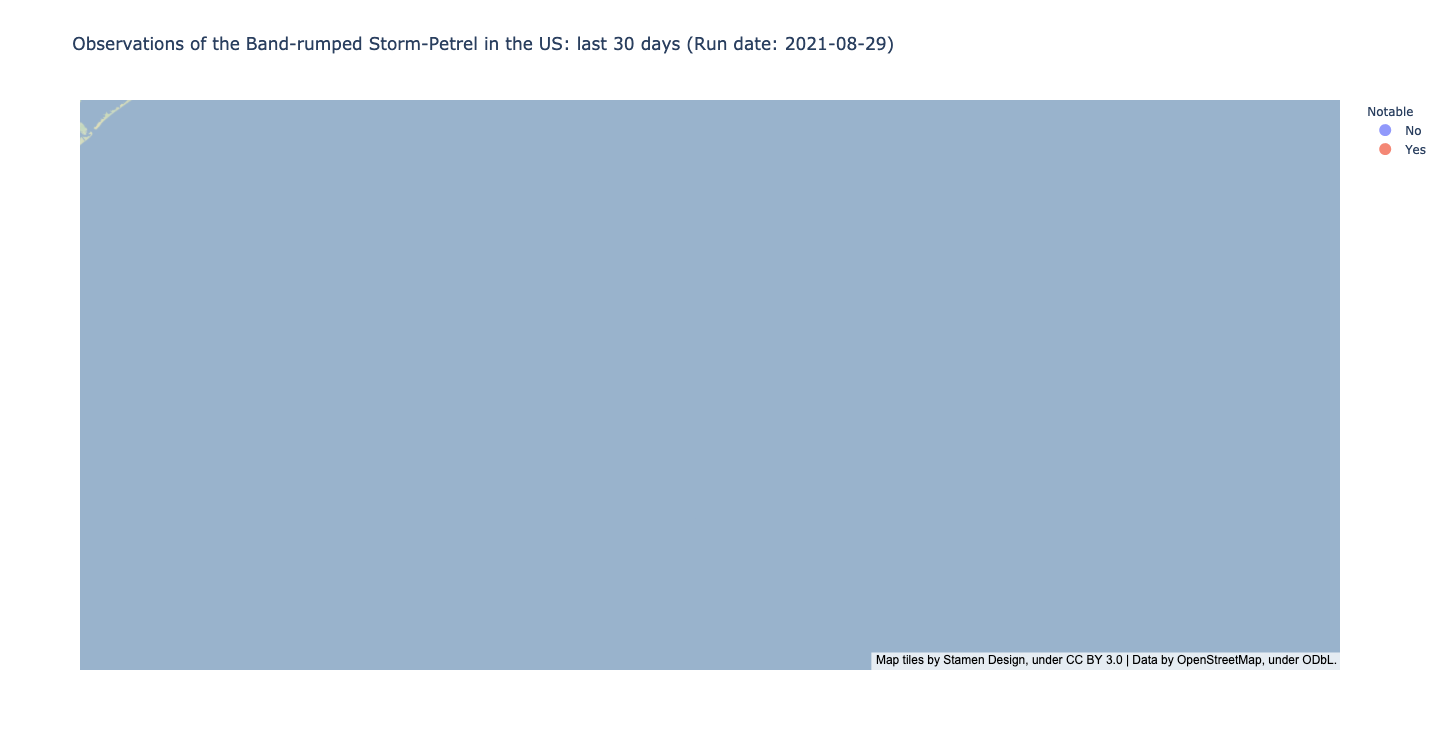

In [52]:
# US_SPECIES_OBS_df["Notable_Normal"] = US_SPECIES_OBS_df["Notable_Normal"].astype(str)
# TX_SPECIES_OBS_df["Notable_Normal"] = TX_SPECIES_OBS_df["Notable_Normal"].astype(str)

fig_results_clean_df = px.scatter_mapbox(
    results_clean_df,
    lat="lat",
    lon="lng",
    color="Notable",
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Scientific_Name", "Family_Name", "Bird_Count", "Date", "Notable"],
    title=f"Observations of the {species} in the US: last {days_back_long} days (Run date: {today})",
    mapbox_style="stamen-terrain",
    width=1000,
    height=750,
)

fig_results_clean_df.show()

<img src="./Resources/RangeMap_Cornell.png" alt="RANGE MAP: Calliope Hummingbird, https://ebird.org/science/status-and-trends/calhum/range-map" style="border: 1px solid darkgray" align="left" width="650px">

<img src="./Resources/Calliope_Range_Map.png" alt="RANGE MAP: Calliope Hummingbird, https://doi.org/10.2173/bow.calhum.01" style="border: 1px solid darkgray" align="right" width="500px">

<span style="color:darkgreen">
<h1 align="center">Observations Outside of Normal Fall Migration Range</h3>
<h3 align="center">Calliope Hummingbird, Selasphorus calliope</h3>
    
### The notable observations are plotted on the map in yellow dots and the normal observations are in purple.  

### Comparing this map to the range map provided by the Cornell Ornithology Lab via eBird.org, it is clear that these observations of the Calliope Hummingbird are considered "notable" due to their distance outside of the normal and predicted range for this species during their migration south to their wintering grounds in Mexico.  Observations can be seen clustering largely in the southwestern states as we progress deeper into migration season.
    
### Range maps are constructed from a combination of scientific observations, citizen observations recorded on eBird.org, and satellite imagery which delineates natural habitats.  According to this range map, Calliope are not expected to travel over the majority of Texas, but rather their movements are typically restricted to west, or even far west, Texas as they fly south for the winter to the pine oak forests of Mexico.
    
##### Map image and information contained herein credited to the Cornell Lab of Ornithology, found here: https://ebird.org/science/status-and-trends/calhum/range-map

-----

<span style="color:darkgreen">

## Observations colored by day show the most recent sightings clustered near the southern border of the US as the birds continue to migrate south.

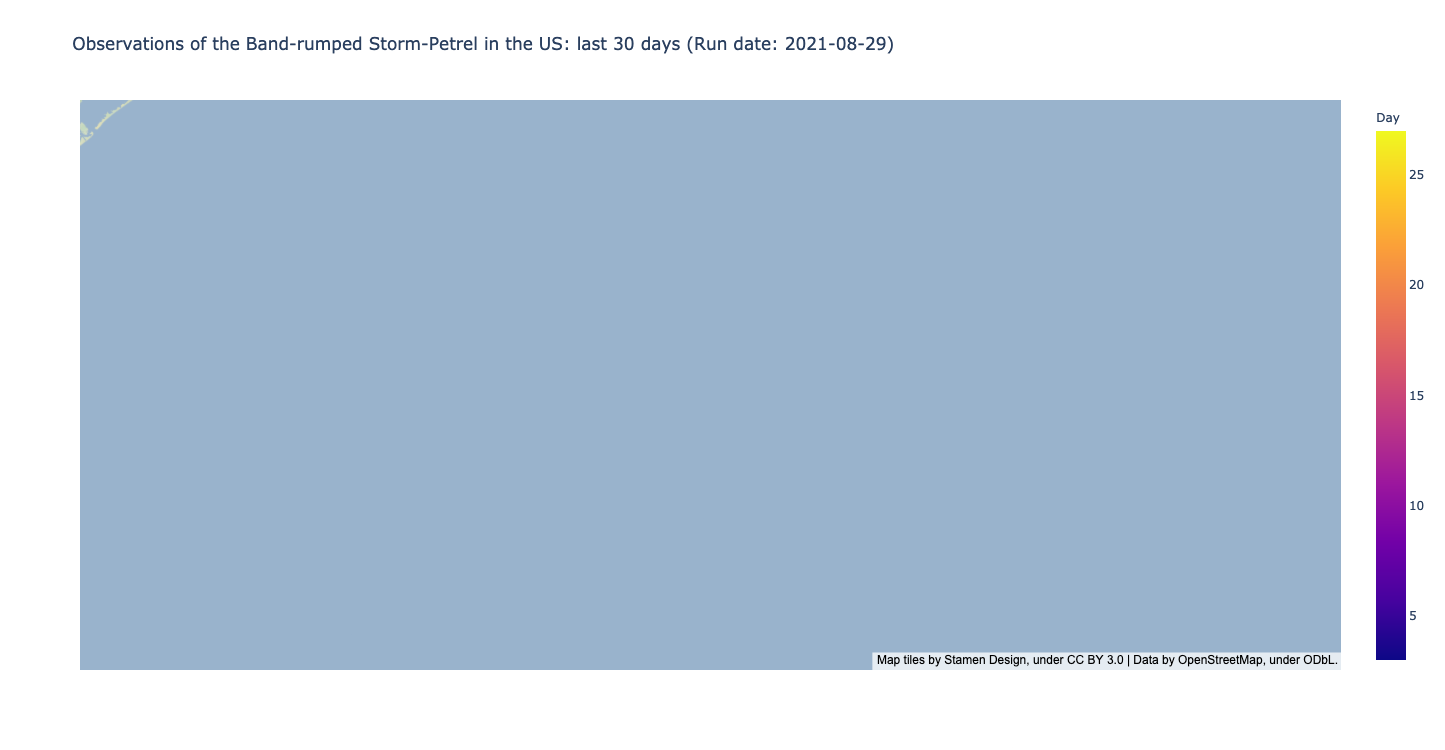

In [53]:
# US_SPECIES_OBS_df["Notable_Normal"] = US_SPECIES_OBS_df["Notable_Normal"].astype(str)
# TX_SPECIES_OBS_df["Notable_Normal"] = TX_SPECIES_OBS_df["Notable_Normal"].astype(str)

fig_results_day_df = px.scatter_mapbox(
    results_clean_df,
    lat="lat",
    lon="lng",
    color="Day",
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Scientific_Name", "Family_Name", "Bird_Count", "Date", "Notable"],
    title=f"Observations of the {species} in the US: last {days_back_long} days (Run date: {today})",
    mapbox_style="stamen-terrain",
    width=1000,
    height=750,
)

fig_results_day_df.show()

<span style="color:darkgreen">

## Animated map showing the most frequent notable observations of a species in Texas compared to the normal observations located more centrally in the established flyway for fall migration.

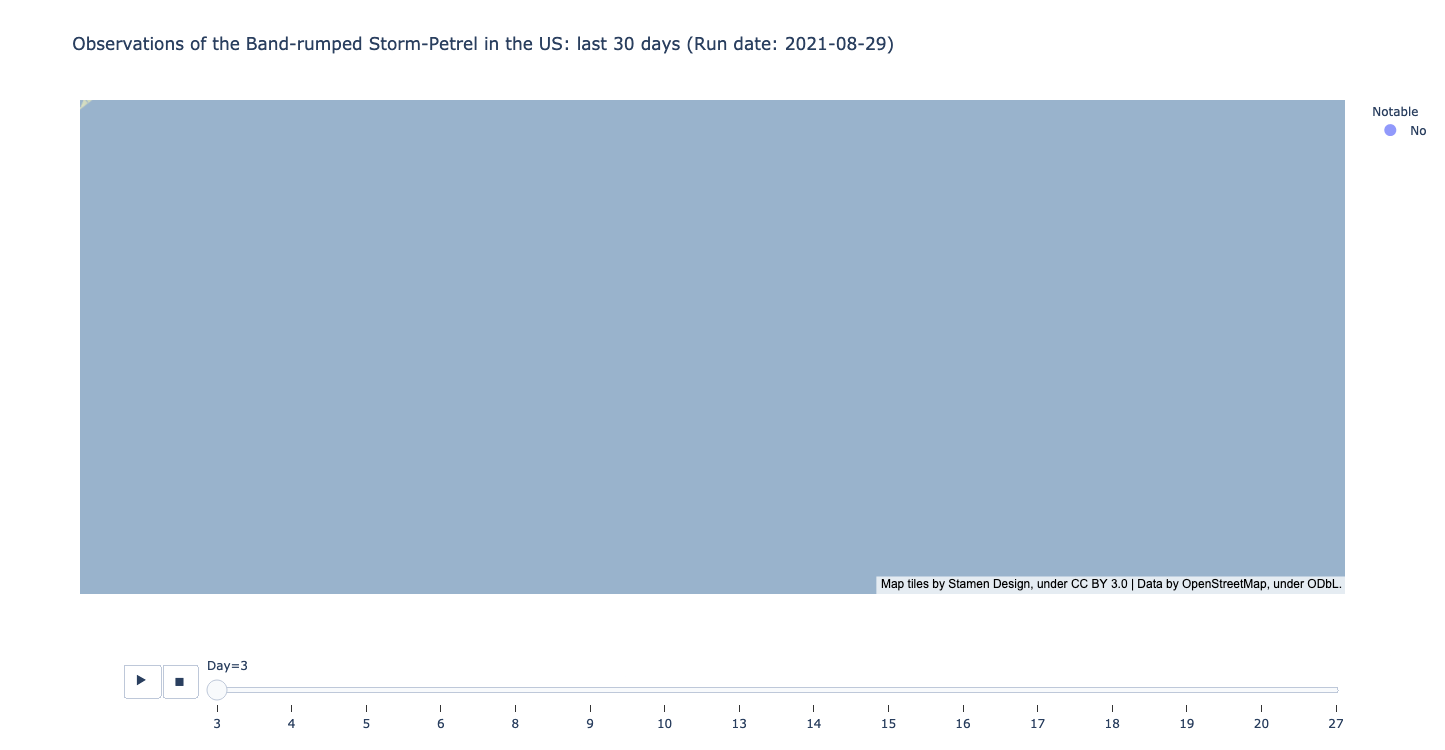

In [54]:
# Animated map of notable and normal sightings

fig_results_clean_df_animate = px.scatter_mapbox(
    results_clean_df,
    lat="lat",
    lon="lng",
    color="Notable",
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Scientific_Name", "Family_Name", "Bird_Count", "Date", "Notable"],
    title=f"Observations of the {species} in the US: last {days_back_long} days (Run date: {today})",
    mapbox_style="stamen-terrain",
    width=1000,
    height=750,
    animation_frame="Day",  # The single line that brings animation to the map based on the parameter indicated
)

fig_results_clean_df_animate.show()

<span style="color:darkgreen">

## The call of the Calliope Hummingbird (audio file from All About Birds, by The Cornell Lab)

In [55]:
## Import sound dependencies
from IPython.display import Audio, display


def calliope_call():
    display(
        Audio(
            url="https://www.allaboutbirds.org/guide/assets/sound/535904.mp3",
            autoplay=True,
        )
    )


calliope_call()

-----

<span style="color: #2ecc71">
    
## Limitations
### * Incorrect identification of species by observers
### * Dependent on citizen scientists (observations not always consistent)
### * API limit on data request volume
## Future Work
### * Why do these birds sometimes wander far from the normal migratory path?
### * Is there a human element impacting the movements of certain birds?
### * Integrate a separate dataset, such as light pollution, to examine impact on bird sightings and movement.

-----

<span style="color:darkgreen">

## Notes:
### Data cleaning: 
#### * Renamed columns
#### * Dropped duplicate rows
#### * Dropped unneeded columns
#### * From Date column, created new columns Year, Month, Day, and US_State.
#### * Used .fillna(1) for rows with missing Bird Count data. Filled with a value of "1" since the observation wouldn't have been recorded if there were 0 birds. Also, most observations were of 1 bird.

### Data Sources:
#### * eBird API: pulled data from the Notable Observations endpoint, the Recent Observations by Region endpoint, and the Taxonomy endpoint. From the Taxonomy data, added the specie's family name to the working dataframe to add to the tooltips on the maps.
#### * Calliope Hummingbird call: https://www.allaboutbirds.org/guide/Calliope_Hummingbird/sounds
#### * WhatBird.com: Range map
#### * Range Map from Cornell Lab of Ornithology (https://birdsoftheworld.org/bow/species/calhum/cur/introduction)